In [ ]:
!pip install scikeras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,Dropout
import numpy as np
from numpy.random import seed
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv('train_clean.csv', )
test = pd.read_csv('test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [ ]:
df.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [ ]:
df.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Family_Size       0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

In [ ]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

In [ ]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: int8

In [ ]:
df.shape

(1309, 14)

In [ ]:
categorical = ['Embarked', 'Title']
for var in categorical:
    df = pd.concat([df, pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [ ]:
df.head()

,Age,Cabin,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,NaN,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,A/5 21171,0,0,1,0,0,0,1,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,PC 17599,1,0,0,0,0,0,0,1,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,STON/O2. 3101282,0,0,1,0,0,1,0,0,0
3,35.0,C123,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,113803,0,0,1,0,0,0,0,1,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,373450,0,0,1,0,0,0,1,0,0


In [ ]:
df.shape

(1309, 21)

In [ ]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

In [ ]:
# Standardization of interval data
scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [ ]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
df.shape

(1309, 17)

In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,1309.0,7.327981e-17,1.000382,-2.233408,-0.574635,0.033252,0.451175,3.832549
Family_Size,1309.0,1.628440e-17,1.000382,-0.558346,-0.558346,-0.558346,0.073352,5.758637
Fare,1309.0,2.171254e-17,1.000382,-0.643344,-0.490691,-0.363894,-0.038690,9.261749
Parch,1309.0,1.730218e-17,1.000382,-0.445000,-0.445000,-0.445000,-0.445000,9.956864
Pclass,1309.0,-2.062691e-16,1.000382,-1.546098,-0.352091,0.841916,0.841916,0.841916
Sex,1309.0,6.440031e-01,0.478997,0.000000,0.000000,1.000000,1.000000,1.000000
SibSp,1309.0,-1.628440e-17,1.000382,-0.479087,-0.479087,-0.479087,0.481288,7.203909
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Embarked_C,1309.0,2.070283e-01,0.405331,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_Q,1309.0,9.396486e-02,0.291891,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
#seed=1234
#np.random.seed(seed)

In [ ]:
X_train= df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
Y_train= df[pd.notnull(df['Survived'])]['Survived']
X_test=df[pd.isnull(df['Survived'])].drop(['Survived'],axis=1)

In [ ]:
def create_model(lyrs=[8,10,10],act='linear',opt='Adam',dr=0.0):
  #set random seed for reproducibility
  #seed(42)
  tf.random.set_seed(42)
  model=Sequential()
  #Create first hidden layer
  model.add(Dense(lyrs[0],input_dim=X_train.shape[1],activation=act))
  # Create additional hidden layers
  for i in range(1,len(lyrs)):
    model.add(Dense(lyrs[i],activation=act))
  #add dropout, default is none
  model.add(Dropout(dr))
  #Create output layer
  model.add(Dense(1,activation='sigmoid')) # Output layer
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [ ]:
model=create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 10)                90        
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
training=model.fit(X_train,Y_train, epochs=100,batch_size=32,validation_split=0.2,verbose=0)

In [ ]:
val_acc=np.mean(training.history['accuracy'])
print("\n%s:%.2f%%" % ("val_acc", val_acc*100))


val_acc:81.47%


<function matplotlib.pyplot.show(close=None, block=None)>

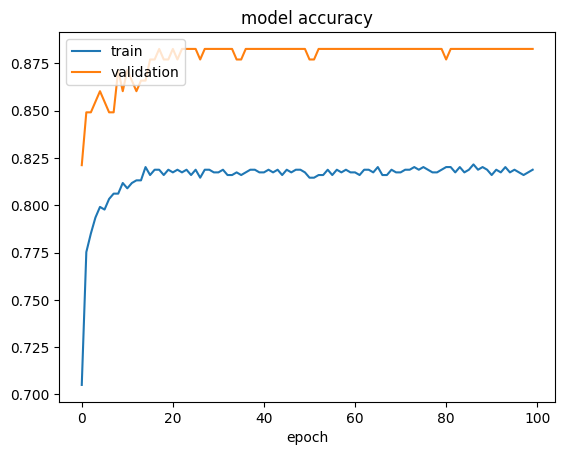

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper left')
plt.show

In [ ]:
model =KerasClassifier(model=create_model,verbose=0)
#define the grid search parameters
batch_size=[16,32,64]
epochs=[50,100]
param_grid=dict(batch_size=batch_size,epochs=epochs)

#search the grid
grid= GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   cv=3,
                   verbose=2)
                    # include n_jobs=-1 if you are using CPU

**Old code prepared by me**

In [ ]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20)

In [ ]:
train_x.shape


(712, 16)

In [ ]:
model=Sequential()
model.add(Dense(24,input_dim=16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 24)                408       
                                                                 
 dense_10 (Dense)            (None, 16)                400       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 825
Trainable params: 825
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Train the model
model.fit(train_x, train_y, batch_size=5, epochs=200, verbose=0)

In [ ]:
results = model.evaluate(test_x, test_y)

6/6 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.8156


In [ ]:
results = model.evaluate(test_x, test_y)

6/6 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.8156
